<a href="https://colab.research.google.com/github/abhayraghuwanshi/stocks_predictions/blob/main/stonks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np

In [97]:
stcs = pd.read_csv("/content/drive/MyDrive/DATA/stocks/tcs_2015.csv", index_col="Date")
stcs.index = pd.to_datetime(stcs.index)
stcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [98]:
sinfy = pd.read_csv("/content/drive/My Drive/DATA/stocks/infy_2015.csv", index_col="Date" )
sinfy.index = pd.to_datetime(sinfy.index)
sinfy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
def stock_price_analysis(data, weeks, name):
    temp = pd.DataFrame()
    temp["close"] = data["Close"].resample("W").mean()
    for week in weeks:
      temp["close_"+ str(week) + "w"] = temp['close'].rolling(window = week).mean()

    temp.plot(figsize=(24,6))
    plt.grid(True)
    plt.title(' Moving Averages of ' + name)
    plt.axis('tight')
    plt.ylabel('Price')

<h1> Graph</h1>
When short-term crosses above long-term we get a buy signal. When short-term passes below the longer-term we get a sell signal.

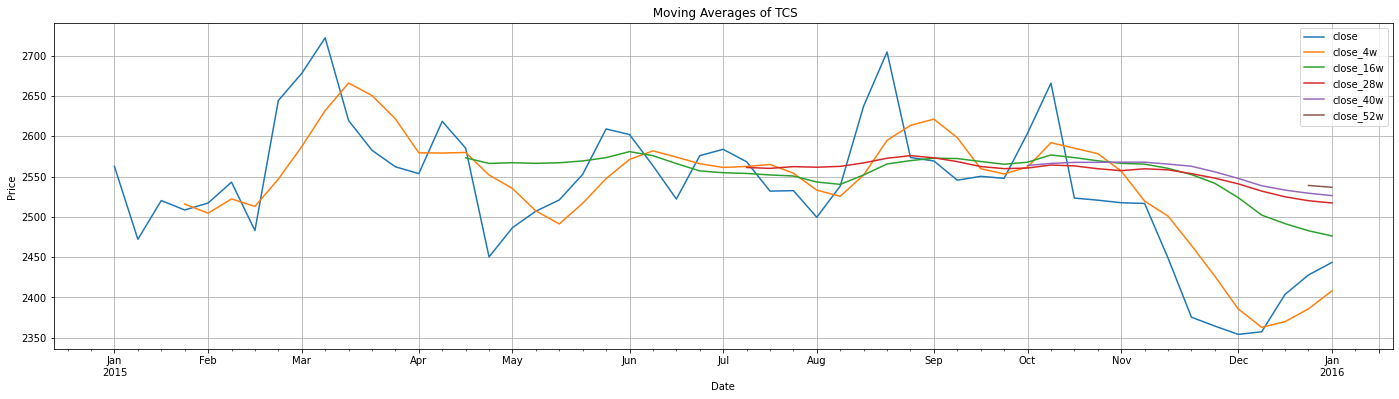

In [103]:
stock_price_analysis(stcs, [4, 16, 28, 40, 52], "TCS")

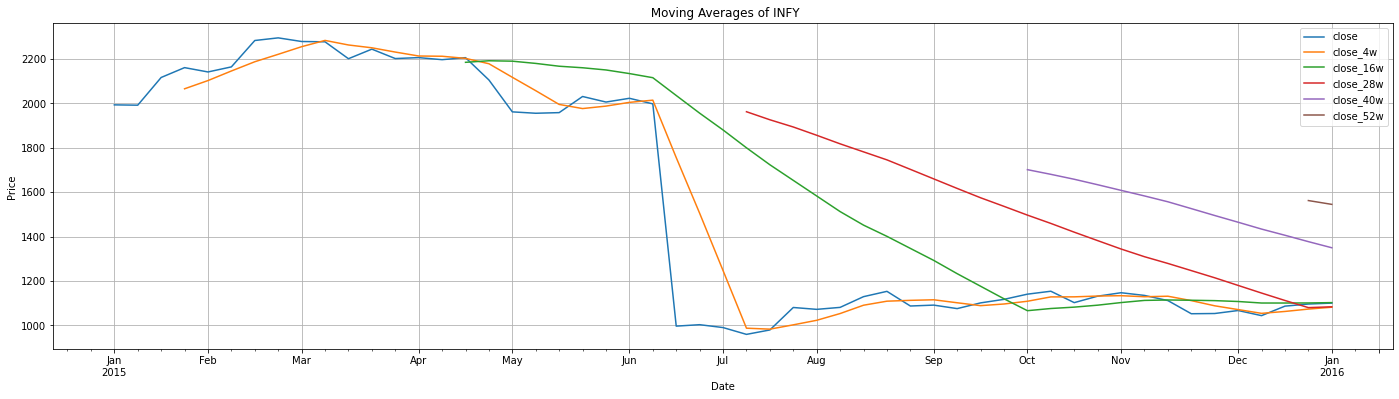

In [104]:
stock_price_analysis(sinfy, [4, 16, 28, 40, 52], "INFY")

In [106]:
def stock_price_day_mov_avg(data, days, name):
  temp = pd.DataFrame()
  temp['close'] = data['Close'].asfreq('D', method ='pad')
  for day in days:
    temp['close_'+str(day)+"d"] = temp['close'].rolling(window = day).mean()
  temp.plot(figsize=(24,6))
  plt.grid(True)
  plt.title(' Moving Averages of ' + name)
  plt.axis('tight')
  plt.ylabel('Price')


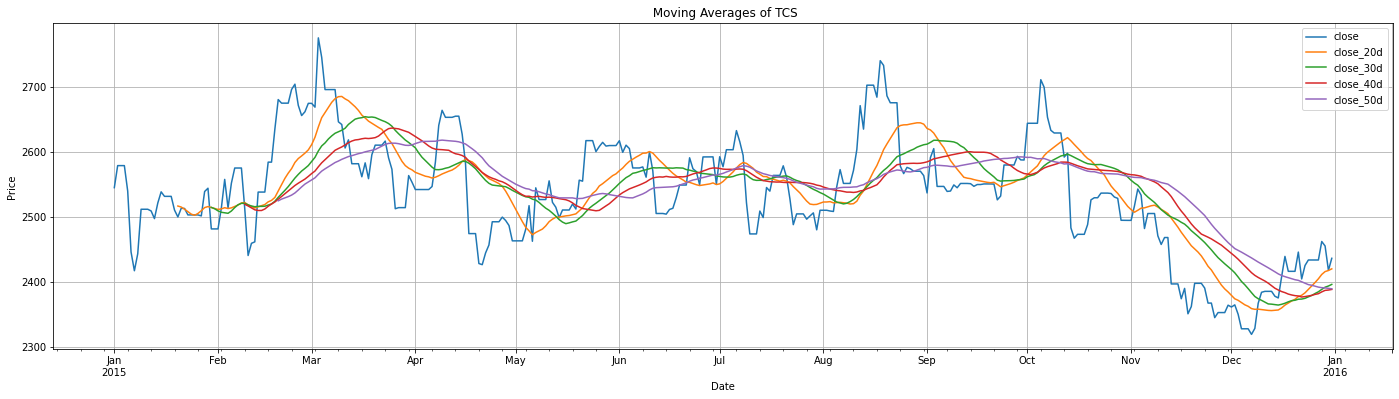

In [107]:
stock_price_day_mov_avg(stcs, [20,30,40,50], "TCS")

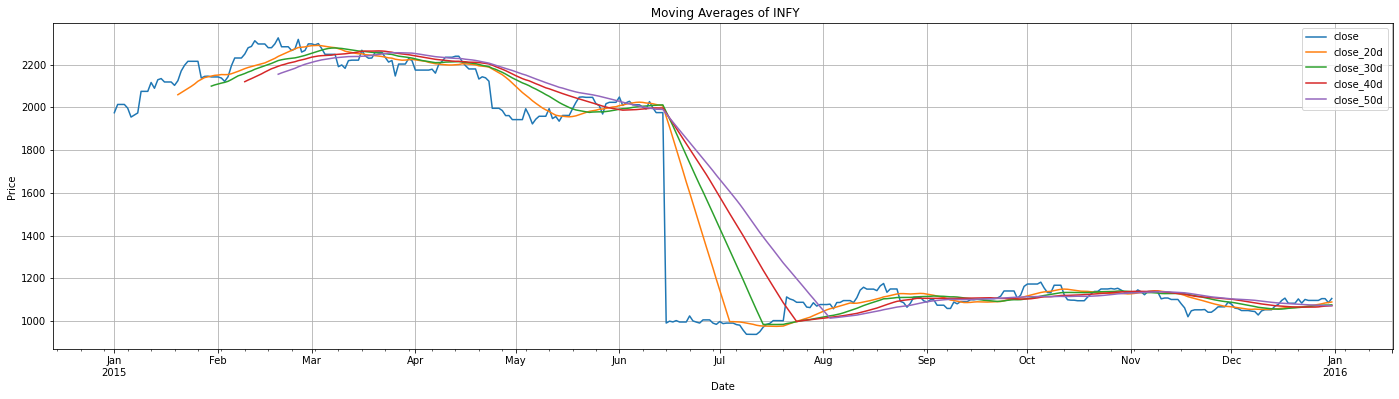

In [108]:
stock_price_day_mov_avg(sinfy, [20,30,40,50], "INFY")

<h1> Creating Dummy Variable</h1>

<h2> Volume shocks </h2> 
making a 0/1 dummy-coded boolean time series for shock, based on whether volume traded is 10% higher/lower than previous day. ( 0/1 dummy-coding is for direction of shock)

In [117]:
stcs["Volume_shift_1"] = stcs["Volume"].shift(1)
stcs["volume_shocks"] = (stcs.loc[:, "Volume_shift_1"] - stcs.loc[:, "Volume"])/ stcs.loc[:, "Volume"] 
stcs["volume_shocks"] = (abs(stcs["volume_shocks"]) > 0.1).astype(int)

<h2> Price shocks </h2>
making a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock)

In [118]:
stcs["price_shocks"] = (stcs.loc[:, "Close"] - stcs.loc[:, "Prev Close"]) / stcs.loc[:, "Close"] 
stcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shift_1,volume_shocks,price_shocks
Date,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,0,-0.004989
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,183415.0,1,0.013142
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,462870.0,1,-0.015432
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,877121.0,1,-0.038278
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,1211892.0,0,-0.011954


In [119]:
stcs["price_shocks"] = (abs(stcs["price_shocks"]) > 0.02).astype(int)

In [120]:
stcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shift_1,volume_shocks,price_shocks
Date,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,0,0
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,183415.0,1,0
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,462870.0,1,0
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,877121.0,1,1
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,1211892.0,0,0


<h2>Pricing black swan</h2>
 making a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 5%. ( 0/1 dummy-coding is for direction of shock)

In [121]:
stcs["price_black_swan"] = (stcs.loc[:, "Close"] - stcs.loc[:, "Prev Close"]) / stcs.loc[:, "Close"] 

In [122]:
stcs["price_black_swan"] = (abs(stcs["price_shocks"]) > 0.05).astype(int)

<h2>Pricing shock without volume shock</h2>
creating a new time series based on price shock and volume shock

In [153]:
stcs["price_shock_without_volume_shock"] = np.nan
for i, row in stcs.iterrows():
  if ((stcs.loc[i, "price_shocks"]) == 1 and (stcs.loc[i, "volume_shocks"]==0)):
    print("yes")
    stcs.loc[i, "price_shock_without_volume_shock"] = 1
  else :
    stcs.loc[i, "price_shock_without_volume_shock"] = 0

yes
yes
yes
yes


In [154]:
stcs["price_shock_without_volume_shock"].unique()

array([0., 1.])